# Spatial networks analysis
Preliminary analysis, missing one data file on analysis of distances before bridges construction.


In [2]:
from tqdm import tqdm
from sklearn.manifold import TSNE
from collections import defaultdict
#from fa2 import ForceAtlas2
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
#from fitter import Fitter
from scipy.stats import pearsonr as pearson

import warnings
warnings.filterwarnings('ignore')
import math
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import ast
import networkx as nx

%matplotlib inline

In [8]:
#distance_matrix 
dm = pd.read_excel('distancesHungary.xlsx')

In [9]:
dm.head()

,Unnamed: 0,Budapest,Békéscsaba,Debrecen,Eger,Győr,Kaposvár,Kecskemét,Miskolc,Nyíregyháza,Pécs,Salgótarján,Szeged,Szekszárd,Szolnok,Szombathely,Székesfehérvár,Tatabánya,Veszprém,Zalaegerszeg
0,Budapest,NaN,204249.195522,230907.097080,129726.214912,123355.208008,185367.765158,84203.508008,183285.683535,230830.872564,199509.089461,110500.509336,170796.885961,145276.733542,104445.854118,222657.563633,63929.482699,63629.379983,113616.108954,230143.439384
1,Békéscsaba,204493.051515,NaN,134553.342586,187047.369418,322788.970514,381638.459664,121442.624514,236921.516040,181892.043070,299998.133966,303343.917841,96848.597467,245765.778048,109033.587624,422091.326138,260200.177205,263063.142489,309886.803460,426414.133890
2,Debrecen,231591.816073,134103.316586,NaN,129274.472976,354329.280072,416341.837222,180248.734072,113406.434598,49498.482880,445800.271524,232484.354399,229100.211025,391567.915606,126104.929181,453631.635696,294903.554763,294603.452046,344590.181017,461117.511447
3,Eger,129802.993990,187616.537503,130185.248060,NaN,252540.457989,314553.015139,203558.980989,82563.834515,130109.023545,344011.449441,62176.618108,290152.358942,289779.093523,105687.677098,351842.813613,193114.732680,192814.629963,242801.358934,359328.689364
4,Győr,123436.041001,321909.769514,353927.340072,252746.457904,NaN,215546.258150,201864.082000,306305.926526,353851.115556,303563.517452,233520.752327,288457.459953,249331.161534,229336.188110,100196.828624,85056.346698,65995.363975,78628.038946,138973.815376


In [20]:
# let us calculate distributions of distances between various cities 
dm.columns
matrix_dm = pd.DataFrame.to_numpy(dm)
#print(matrix_dm)

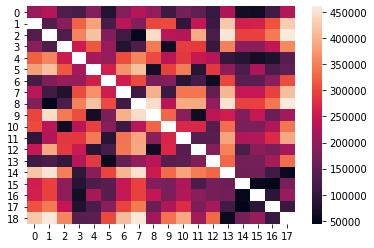

In [16]:
# first plot scatter plot for matrix 

#dm = dm.drop(dm.columns[[0]], axis=1)
#dm = dm.drop(dm.columns[[1]], axis=0)

# Default heatmap
p1 = sns.heatmap(matrix_dm)



<AxesSubplot:ylabel='Density'>

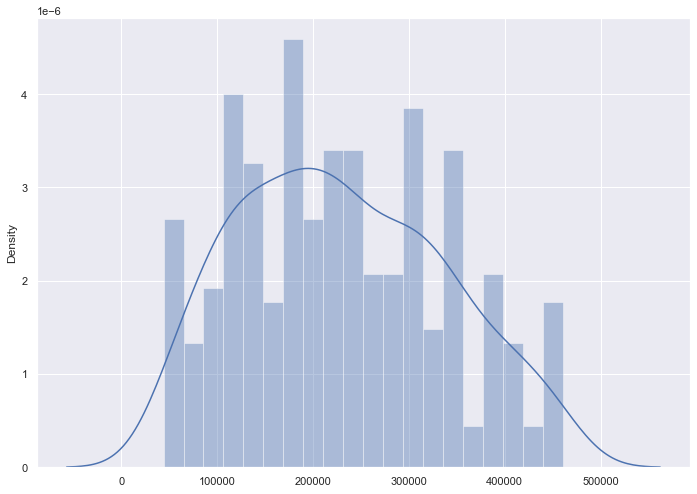

In [27]:
# plot distribution 
# some good example for plotting https://www.python-graph-gallery.com/20-basic-histogram-seaborn

flat_dist = matrix_dm.flatten()
#p2 = sns.jointplot(matrix_dm[0:,],matrix_dm[1:,], kind='scatter')

# Plot the histogram thanks to the distplot function
sns.distplot( flat_dist, hist=True, kde=True, bins =20, rug=False ) # need to divide by two...


# Compare distances distirbution before and after bridges construction

No handles with labels found to put in legend.


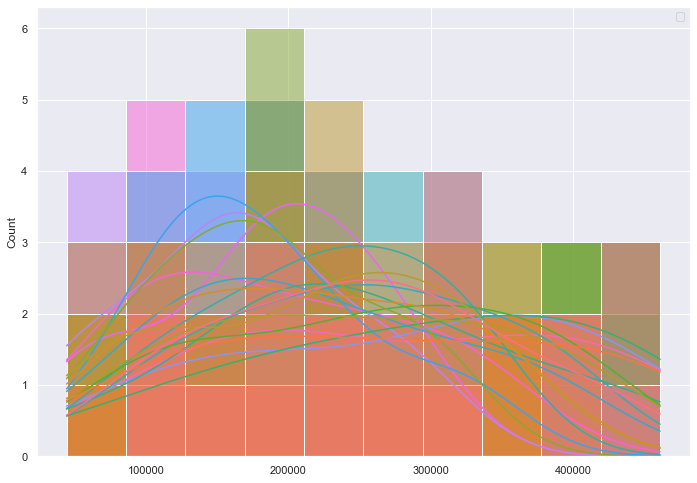

In [24]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt

dmatrix_withoutbridges = ('distancesHungary_withoutbridges.xlsx')

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=dm, color="skyblue",  kde=True) #label="cities",

plt.legend() 
plt.show()

# Null models analysis 

Null-gravity-like models:
- given $$ p_i, p_j, d_{ij} $$, what is the expected number of connections c_ij between those places 
and what is the exponent a for function f(d) = d^a
task here is to find best a exponent 
- there is more sophisticated deep gravity model inspired from here https://github.com/scikit-mobility/DeepGravity
which may "detect hidden" underlying patterns, but maybe it is a bit far fetched for 20 cities only...


### Calculating flows between nodes and comparing with our hypothesis
We can try variation of gravity model

$$ s_{ij} = \frac{p_j^\alpha}{d_{ij}^\beta} $$

where $ p_j $ = number of people in city $$ j $$



We can always introduce a temporal aspect to the model,  where we calculate both $m_j$ and $d_{ij}$ as functions of time. 


In [ ]:
# load data on population 
p = data_pop["Population"].values

# load data on other social factors 

In [ ]:
import networkx as nx
import math
from scipy.optimize import curve_fit


# loop through all couples of edges combinations of graph G with adjacency matrix given by matrix_dm

G = nx.from_numpy_matrix(matrix_dm, parallel_edges=False, create_using=None)

# Relabel nodes
#G = nx.relabel_nodes(G, {i: f"node_{i}" for i in G.nodes})

edges = list(G.edges) # get list of edgest with weights - distances 

s_ij = {}
D_ij = matrix_dm

alpha = 0.1 # starting parameters for fitting, should be in right bounds
beta = 0.1

def fit_func(x,a,c):    
    return c*(x**a)

for (i,j) in edges: # use double loop or go through all edges
    
    # estimate quantity for each city based on model 1 
    s_ij = math.pow(p[i], alpha) / math.pow(D_ij[i,j], beta)
    
    # fitting function 
    
    param,pcov = curve_fit(fit_func,newavg_x[2:],newavg_y[2:])

    #checking conditions for finding good fit
    #dist = np.sqrt(sum((np.array(Centroids[u])-np.array(Centroids[v]))**2))
        
    
    

